### **Métodos de Optimización**
#### Prácticas computacionales de "Métodos de Búsqueda"

Instrucciones para los Ejercicios

1. **Trabajo en Grupo:**
   - Los ejercicios deben ser resueltos y entregados en grupo.
   - La cantidad de integrantes por grupo será definida el día de la actividad, así como la fecha límite para la entrega.

2. **Uso de Google Colab y Compartir:**
   - Este notebook debe ser copiado al GitHub o Google Drive de alguno de los integrantes del grupo.
   - El grupo será responsable de programar las soluciones, realizar las pruebas y enviar el trabajo final al profesor.

3. **Implementación de los Ejercicios:**
   - Cada ejercicio debe ser implementado de manera que cumpla con los objetivos específicos descritos en cada problema.
   - El código debe devolver claramente la información calculada de acuerdo a lo solicitado.

4. **Calidad del Código:**
   - El código debe ejecutarse sin errores.
   - Es obligatorio incluir **comentarios explicativos** para describir las ideas y conceptos implícitos en el código, facilitando la comprensión de su lógica.

5. **Envío del Trabajo:**
   - Una vez completado, el notebook debe ser enviado a través de Moodle.
   - En caso de dudas, pueden contactarme por correo electrónico a **marcelo.danesi@utec.edu.uy**.

6. **Orientaciones Adicionales:**
   - Asegúrense de que todas las celdas de código hayan sido ejecutadas antes de enviar.
   - Incluyan el nombre completo y correo electrónico de todos los integrantes al inicio del notebook.
   - Si utilizan referencias externas, menciónenlas de forma adecuada.

¡Buena suerte y aprovechen la práctica para consolidar los conceptos de métodos optimización!

#### **Métodos de Búsqueda**

#### **1) Búsqueda de la sección dorada (Golden Section)**

**Idea clave.**  
Para minimizar una función **unimodal** en 1D sobre un intervalo cerrado $[a,b]$, la **sección dorada** reduce el intervalo evaluando $f$ en dos puntos internos que preservan proporciones áureas ($\varphi$). No requiere derivadas y es robusta.

**Cuándo usarla.**  
- Funciones 1D **continuas** y **unimodales** en el intervalo dado.  
- Útil como subrutina dentro de métodos multi-D (p.ej., descenso coordinado).

**Nota de paquetes/funciones.**  
- Se puede implementar **sin SciPy** fácilmente.  
- Si se desea comparar, `scipy.optimize.golden` resuelve minimización 1D (pero aquí implementaremos la versión manual para aprender el mecanismo).

##### **Ejemplo guiado — Implementación de Golden Section + caso de prueba**


**Objetivos**
1. Implementar la función `golden_section_minimize` que recibe $f, [a,b]$, `tol`, `max_iter`.
2. Registrar iteraciones (opcional) para **mostrar las 3 primeras** y visualizar la mecánica.
3. Aplicar el método sobre $f(x)=x^4-6x^2+4x$ en $[3/4, 2]$ y **graficar** $f$ marcando el $x^*$ hallado.

**Entradas**
- `f`: función escalar $f:\mathbb{R}\to\mathbb{R}$.  
- `a, b`: extremos con $a< b$, donde $f$ es unimodal.  
- `tol`: tolerancia sobre la longitud del intervalo (p.ej., $10^{-8}$).  
- `max_iter`: máximo de iteraciones (p.ej., 200).  
- `history` (bool): si `True`, almacena $(a,b,x_1,x_2,f(x_1),f(x_2))$ por iteración.

**Salidas**
- `x_star`: estimación del minimizador en $[a,b]$.  
- `f_star`: valor $f(x_\star)$.  
- `k`: número de iteraciones realizadas.  
- `hist` (opcional): lista con los estados por iteración (útil para reportes/tablas).

**Nota de paquete**
- No requiere SciPy. (Para comparar, existe `scipy.optimize.golden`, pero aquí implementamos la versión "a mano" para comprender el algoritmo).

=== Ejemplo — Sección dorada ===
Intervalo inicial: [0.750000, 2.000000]
Iteraciones: 39
x* ≈ 1.5320888962
f(x*) ≈ -2.4456224073


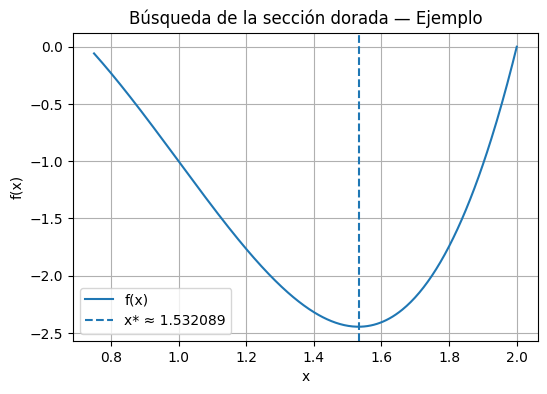


Primeras 3 iteraciones (a, b, x1, x2, f1, f2):
k=01 | a=0.750000, b=2.000000, x1=1.227458, x2=1.522542, f1=-1.860082, f2=-2.444891
k=02 | a=1.227458, b=2.000000, x1=1.522542, x2=1.704915, f1=-2.444891, f2=-2.171642
k=03 | a=1.227458, b=1.704915, x1=1.409830, x2=1.522542, f1=-2.335768, f2=-2.444891


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

def golden_section_minimize(f, a, b, tol=1e-8, max_iter=200, history=False):
    """
    Minimiza f en [a,b] usando búsqueda de la sección dorada.

    Entradas:
      - f: función escalar f(x)
      - a, b: extremos del intervalo con a < b, donde f es unimodal
      - tol: tolerancia sobre la longitud del intervalo
      - max_iter: tope de iteraciones
      - history: si True, guarda (a,b,x1,x2,f1,f2)

    Salidas:
      - x_star: estimación del minimizador
      - f_star: f(x_star)
      - k: número de iteraciones realizadas
      - hist (opcional): lista con tuplas del estado por iteración
    """
    phi = (1 + math.sqrt(5)) / 2  # razón áurea
    inv_phi = 1 / phi

    # Puntos internos iniciales
    x1 = b - inv_phi * (b - a)
    x2 = a + inv_phi * (b - a)
    f1, f2 = f(x1), f(x2)

    hist = []
    for k in range(1, max_iter + 1):
        if history:
            hist.append((a, b, x1, x2, f1, f2))

        # Descarta el lado "peor" manteniendo la proporción áurea
        if f1 > f2:
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + inv_phi * (b - a)
            f2 = f(x2)
        else:
            b = x2
            x2 = x1
            f2 = f1
            x1 = b - inv_phi * (b - a)
            f1 = f(x1)

        if abs(b - a) < tol:
            break

    x_star = (a + b) / 2.0
    f_star = f(x_star)
    return (x_star, f_star, k, hist) if history else (x_star, f_star, k, None)

# --- Ejemplo: función polinómica (unimodal en el intervalo dado)
def f_ex(x):
    # Ejemplo alineado con prácticas previas: f(x) = x^4 - 6x^2 + 4x
    return x**4 - 6*x**2 + 4*x

# Intervalo de prueba trabajado en clase
a0, b0 = 3/4, 2.0

x_star, f_star, iters, hist = golden_section_minimize(
    f_ex, a0, b0, tol=1e-8, history=True
)

print("=== Ejemplo — Sección dorada ===")
print(f"Intervalo inicial: [{a0:.6f}, {b0:.6f}]")
print(f"Iteraciones: {iters}")
print(f"x* ≈ {x_star:.10f}")
print(f"f(x*) ≈ {f_star:.10f}")

# Gráfico (f y marca del x* final)
xs = np.linspace(a0, b0, 400)
plt.figure(figsize=(6,4))
plt.plot(xs, [f_ex(x) for x in xs], label="f(x)")
plt.axvline(x_star, linestyle="--", label=f"x* ≈ {x_star:.6f}")
plt.title("Búsqueda de la sección dorada — Ejemplo")
plt.xlabel("x"); plt.ylabel("f(x)")
plt.grid(True); plt.legend()
plt.show()

# Mostrar explícitamente las primeras 3 iteraciones para visualizar la mecánica
print("\nPrimeras 3 iteraciones (a, b, x1, x2, f1, f2):")
for i, row in enumerate(hist[:3], start=1):
    a, b, x1, x2, f1, f2 = row
    print(f"k={i:02d} | a={a:.6f}, b={b:.6f}, x1={x1:.6f}, x2={x2:.6f}, f1={f1:.6f}, f2={f2:.6f}")

##### **Tarea 1 — Precisión y reporte iterativo**

**Descripción:**  
Aplicar **sección dorada** para minimizar $ f(x)=x^4 - 6x^2 + 4x $ en $[-10, -1]$ con tolerancia que garantice **10 dígitos significativos** en $x^*$.  

**Objetivos:**  
1. Ajustar `tol` para alcanzar ~$10^{-10}$ en longitud de intervalo.  
2. Reportar **explícitamente las 3 primeras iteraciones** (valores de $a,b,x_1,x_2,f_1,f_2$).  
3. Entregar $x^*, f(x^*)$ y número de iteraciones.

**Entradas:** $f$, intervalo $[a,b]$, `tol`.  
**Salidas:** $x^*$, $f(x^*)$, iteraciones y una tabla con las 3 primeras iteraciones.  
**Pistas:** reutilizá el `history=True` para formatear la tabla.


In [ ]:
# Definimos el intervalo de búsqueda
a_t1 = -10.0
b_t1 = -1.0

# Definimos la tolerancia solicitada para ~10 dígitos significativos
tol_t1 = 1e-10

# Usamos la misma función f_ex(x) = x^4 - 6x^2 + 4x definida en el ejemplo anterior
# Llamamos a la función de sección dorada con history=True para reportar las iteraciones
x_star_t1, f_star_t1, iters_t1, hist_t1 = golden_section_minimize(
    f_ex, a_t1, b_t1, tol=tol_t1, history=True
)

print("=== Sección dorada (Alta Precisión) ===")
print(f"Intervalo inicial: [{a_t1:.6f}, {b_t1:.6f}]")
print(f"Tolerancia (tol): {tol_t1:.1e}")
print(f"Iteraciones: {iters_t1}")
print(f"x* ≈ {x_star_t1:.10f}")       # Mostramos 10 decimales
print(f"f(x*) ≈ {f_star_t1:.10f}")

# --- Reporte de las 3 primeras iteraciones ---
# Imprimimos la cabecera de la tabla
print("\nPrimeras 3 iteraciones (a, b, x1, x2, f1, f2):")
print("-" * 80)
print(f"{'k':>2s} | {'a':>10s} | {'b':>10s} | {'x1':>10s} | {'x2':>10s} | {'f1':>12s} | {'f2':>12s}")
print("-" * 80)

# Iteramos sobre las 3 primeras entradas del historial (hist_t1)
for i, row in enumerate(hist_t1[:3], start=1):
    # Desempaquetamos los valores de la tupla guardada
    a, b, x1, x2, f1, f2 = row
    # Imprimimos los valores formateados
    print(f"{i:02d} | {a:10.6f} | {b:10.6f} | {x1:10.6f} | {x2:10.6f} | {f1:12.6f} | {f2:12.6f}")

=== Sección dorada (Alta Precisión) ===
Intervalo inicial: [-10.000000, -1.000000]
Tolerancia (tol): 1.0e-10
Iteraciones: 53
x* ≈ -1.8793852486
f(x*) ≈ -16.2344223834

Primeras 3 iteraciones (a, b, x1, x2, f1, f2):
--------------------------------------------------------------------------------
 k |          a |          b |         x1 |         x2 |           f1 |           f2
--------------------------------------------------------------------------------
01 | -10.000000 |  -1.000000 |  -6.562306 |  -4.437694 |  1569.863551 |   251.909777
02 |  -6.562306 |  -1.000000 |  -4.437694 |  -3.124612 |   251.909777 |    24.242412
03 |  -4.437694 |  -1.000000 |  -3.124612 |  -2.313082 |    24.242412 |   -12.728185


##### **Tarea 2 — Robustez con ruido**

**Descripción**   
En esta actividad se analizará la **robustez del método de sección dorada** frente a funciones con **ruido aleatorio**.  
Consideramos una función perturbada:
$$ \tilde{f}(x) = f(x) + \varepsilon(x),$$
donde $\varepsilon(x)$ representa un **ruido pequeño** generado aleatoriamente, por ejemplo de tipo **gaussiano**:
$$\varepsilon(x) \sim \mathcal{N}(0, \sigma^2).$$
El propósito es observar cómo el ruido afecta la posición estimada del mínimo y el valor de la función.

**Objetivos**
1. Explorar diferentes niveles de ruido $\sigma \in \{10^{-4}, 10^{-3}, 10^{-2}\}$.  
2. Ejecutar la búsqueda de la **sección dorada** 10 veces para cada \(\sigma\), variando la semilla aleatoria.  
3. Calcular y reportar la **media** y **desvío estándar** de $x^*$ y $f(x^*)$ para cada nivel de ruido.

**Entradas**
- $f$: función base determinista.  
- $[a,b]$: intervalo de búsqueda.  
- `tol`: tolerancia sobre la longitud del intervalo.  
- $\sigma$: desviación estándar del ruido.  
- `seed`: semilla para el generador aleatorio (controla la reproducibilidad).  

**Salidas**
- Tabla con columnas:  
  $(\sigma,\ \text{media}(x^*),\ \text{std}(x^*),\ \text{media}(f^*),\ \text{std}(f^*))$.

**Pistas**
- Usá `np.random.seed(seed)` para fijar la semilla antes de cada ejecución.  
- Definí la función ruidosa como:
  ```python
  def f_noise(x, sigma):
      return f(x) + np.random.normal(0, sigma)
  ```
- Repetí el proceso varias veces y almacená los resultados en listas para luego calcular promedio y desviación estándar con `np.mean` y `np.std`.

**Nota sobre funciones estocásticas:**   
Una **función estocástica** es aquella cuyo valor incluye algún componente de **aleatoriedad**.   
En este ejercicio, el término $\varepsilon(x)$ simula incertidumbre o error de medición.   
Esta idea es fundamental en muchos contextos de optimización moderna, especialmente en **simulaciones de Monte Carlo**, donde las evaluaciones de una función provienen de muestras aleatorias y el objetivo es estimar valores esperados o comportamientos promedio bajo incertidumbre.   
Comprender cómo los métodos de búsqueda responden ante ruido es el primer paso para extenderlos a ese tipo de escenarios.

In [ ]:
import pandas as pd # Usaremos pandas para mostrar la tabla final de forma ordenada

# Definimos la función ruidosa
# Esta función toma 'x' y 'sigma', y llama a la f_ex(x) (del ejemplo)
# sumándole un ruido Gaussiano N(0, sigma^2).

def f_noise(x, sigma):
    # Generamos el ruido aleatorio usando np.random.normal(media, desv_estandar)
    ruido = np.random.normal(0, sigma)
    # Retornamos la función original (determinista) más el ruido
    return f_ex(x) + ruido

# Parámetros del experimento
# Usaremos el intervalo del Ejemplo 1, donde el mínimo es conocido

a_exp, b_exp = 3/4, 2.0

# Niveles de ruido (sigma) a probar
sigmas = [1e-4, 1e-3, 1e-2]

# Número de repeticiones por cada sigma
N_RUNS = 10

# Tolerancia para la búsqueda (no necesitamos alta precisión aquí)
tol_exp = 1e-8

# Lista para almacenar los resultados finales para la tabla
reporte_resultados = []

print("===  Análisis de Robustez (Ruido Gaussiano) ===")
print(f"Intervalo base: [{a_exp}, {b_exp}], N={N_RUNS} corridas por sigma.")

# Bucle principal del experimento
# Bucle externo: iteramos sobre los niveles de ruido
for sigma in sigmas:
    print(f"\nProcesando sigma = {sigma:.1e}...")

    # Listas para guardar los resultados de las N_RUNS corridas (para este sigma)
    run_x_stars = []
    run_f_stars = [] # Nota: f* será el valor ruidoso f_noise(x*)

    # Bucle interno: N_RUNS repeticiones
    for i in range(N_RUNS):
        # Fijamos la semilla aleatoria para reproducibilidad.
        # Usamos 'i' como semilla (0, 1, 2...) para que cada corrida sea diferente.
        np.random.seed(i)

        # Creamos una función lambda que solo depende de 'x',
        # ya que golden_section_minimize espera una función f(x).
        # Esta función usará el 'sigma' actual.
        f_stochastic = lambda x: f_noise(x, sigma)

        # Ejecutamos la minimización sobre la FUNCIÓN RUIDOSA
        x_star, f_star, _, _ = golden_section_minimize(
            f_stochastic, a_exp, b_exp, tol=tol_exp, history=False
        )

        # Guardamos los resultados de esta corrida
        run_x_stars.append(x_star)
        run_f_stars.append(f_star)

    # Calculamos estadísticas (media y std) para este sigma
    mean_x = np.mean(run_x_stars)
    std_x = np.std(run_x_stars)
    mean_f = np.mean(run_f_stars)
    std_f = np.std(run_f_stars)

    # Guardamos las estadísticas
    reporte_resultados.append((sigma, mean_x, std_x, mean_f, std_f))

# Reporte final
print("\n--- Reporte de Estadísticas (Media y Desv. Estándar) ---")

# Creamos un DataFrame de pandas para la visualización
df_reporte = pd.DataFrame(
    reporte_resultados,
    columns=["Sigma (σ)", "Media(x*)", "Std(x*)", "Media(f*)", "Std(f*)"]
)

# Configuramos el formato de visualización
pd.set_option('display.float_format', '{:.8f}'.format)
print(df_reporte.to_string(index=False))

===  Análisis de Robustez (Ruido Gaussiano) ===
Intervalo base: [0.75, 2.0], N=10 corridas por sigma.

Procesando sigma = 1.0e-04...

Procesando sigma = 1.0e-03...

Procesando sigma = 1.0e-02...

--- Reporte de Estadísticas (Media y Desv. Estándar) ---
 Sigma (σ)  Media(x*)    Std(x*)   Media(f*)    Std(f*)
0.00010000 1.53190218 0.00254973 -2.44558486 0.00007748
0.00100000 1.53306993 0.00741442 -2.44532276 0.00073956
0.01000000 1.53329143 0.03458841 -2.43728661 0.01331244


#### **2) Descenso coordinado multidimensional (cíclico y variantes)**

**Idea clave.**  
En problemas multi-D, el **descenso por coordenadas** minimiza iterativamente sobre **una variable a la vez**, manteniendo las demás fijas.  
- **Cíclico:** recorre coordenadas en orden fijo $1,2,\dots,n,1,2,\dots$.  
- Puede usar **búsqueda 1D exacta** (si es barata) o reglas tipo Armijo.

**Cuándo usarlo.**  
- Funciones separables o con subproblemas 1D baratos.  
- Grandes dimensiones donde formar/usar Hessianas es costoso.

**Nota de paquetes/funciones.**  
- `numpy` para álgebra básica.  
- **Opcional:** `scipy.optimize.minimize_scalar` para 1D, pero aquí daremos fórmulas exactas cuando $f$ sea cuadrática.

##### **Ejemplo guiado — Cuadrática convexa con solución cerrada 1D por coordenada**

**Descripción del problema**   
Queremos **minimizar** una función cuadrática **convexa**
$$ f(x)=\tfrac12\,x^\top Q x + b^\top x, $$
donde $Q\in\mathbb{R}^{n\times n}$ es **simétrica definida positiva (SPD)** y $b\in\mathbb{R}^n$.  
Aplicaremos **descenso por coordenadas cíclico**: en cada pasada, actualizamos secuencialmente las
coordenadas $x_1, x_2,\dots,x_n$ manteniendo las demás fijas.

Para cuadráticas con $Q$ SPD, la actualización sobre la coordenada $i$ tiene **paso exacto**:
$$ \alpha_i^* \;=\; -\frac{\nabla f(x)_i}{Q_{ii}}
\quad\Rightarrow\quad
x_i \leftarrow x_i + \alpha_i^*. $$

**Objetivos**
1. Implementar `coord_descent_cyclic(Q, b, x0, tol, max_iter)` con registro opcional de trayectoria.  
2. Aplicar el método en un caso 2D y **comparar** contra la solución cerrada $x^*=-Q^{-1}b$.  
3. **Graficar** contornos de $f$ y la trayectoria (para $n=2$), y **reportar** iteraciones.

**Entradas**
- `Q`: matriz SPD ($n\times n$).  
- `b`: vector ($n$,).  
- `x0`: condición inicial ($n$,).  
- `tol`: tolerancia de parada sobre $\|x^{k+1}-x^{k}\|$.  
- `max_iter`: máximo de pasadas por todas las coordenadas.  
- `record` (bool): si `True`, guarda la trayectoria.

**Salidas**
- `x`: solución aproximada.  
- `f(x)`: valor final de la función.  
- `k`: número de **pasadas** realizadas.  
- `path` (opcional): trayectoria de puntos visitados (útil para gráficos y tablas).

**Nota de paquete**
- Usamos solo `numpy` y `matplotlib`. No se requiere SciPy para el método base.

=== Ejemplo — Descenso por coordenadas (cuadrática convexa) ===
x_final        = [ 0.63636364 -0.54545455]
f(x_final)     = -0.909091
Pasadas (k)    = 9
x* (cerrada)   = [ 0.63636364 -0.54545455]
||x_final-x*|| = 2.786e-10

Primeros 3 estados visitados (después de actualizaciones por coordenada):
01: x = [ 2.000000, -1.000000]
02: x = [ 0.750000, -1.000000]
03: x = [ 0.750000, -0.583333]


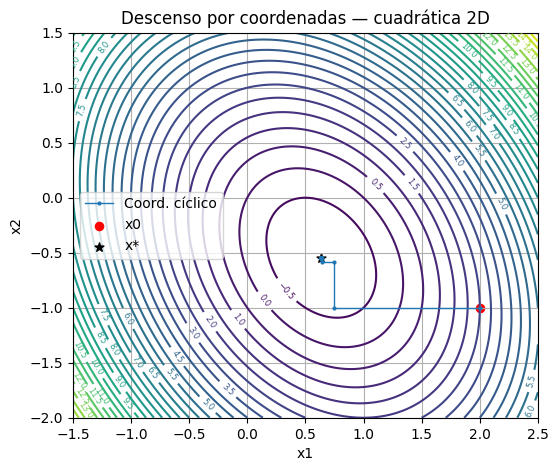

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def quad_Qb(Q, b):
    """Devuelve f(x)=0.5 x^T Q x + b^T x y su gradiente ∇f(x)=Qx+b."""
    def f(x): return 0.5 * x @ Q @ x + b @ x
    def g(x): return Q @ x + b
    return f, g

def coord_descent_cyclic(Q, b, x0, max_iter=200, tol=1e-8, record=True):
    """
    Descenso por coordenadas cíclico con paso exacto en cuadrática:
      α* = - (∇f(x)_i) / (Q_ii)

    Entradas:
      - Q: SPD (n×n)
      - b: (n,)
      - x0: inicial (n,)
      - max_iter: máximo de pasadas por todas las coordenadas
      - tol: tolerancia sobre ||x^{k+1} - x^k||
      - record: si True, devuelve trayectoria

    Salidas:
      - x: solución aproximada
      - f(x): valor final
      - k: número de pasadas realizadas
      - path (opcional): np.array con la trayectoria por coordenadas
    """
    f, g = quad_Qb(Q, b)
    x = x0.astype(float).copy()
    n = len(x)
    path = [x.copy()] if record else None

    for k in range(1, max_iter + 1):
        x_prev = x.copy()
        # Recorremos coordenadas en orden fijo (cíclico)
        for i in range(n):
            grad = g(x)
            # Paso exacto 1D sobre la coordenada i (minimiza f(x + α e_i))
            alpha = -grad[i] / Q[i, i]
            x[i] += alpha
            if record: path.append(x.copy())
        # Criterio de parada: cambio pequeño entre pasadas
        if np.linalg.norm(x - x_prev) < tol:
            break

    return x, f(x), k, (np.array(path) if record else None)

# ------------------ Caso de prueba (2D) ------------------
# Definimos una cuadrática SPD simple y comparamos con la solución cerrada
Q = np.array([[4.0, 1.0],
              [1.0, 3.0]], dtype=float)
b = np.array([-2.0, 1.0], dtype=float)
x0 = np.array([2.0, -1.0], dtype=float)

xf, ff, iters, path = coord_descent_cyclic(Q, b, x0, max_iter=200, tol=1e-8, record=True)
xstar = -np.linalg.solve(Q, b)

# --- Reporte en texto
print("=== Ejemplo — Descenso por coordenadas (cuadrática convexa) ===")
print(f"x_final        = {xf}")
print(f"f(x_final)     = {ff:.6f}")
print(f"Pasadas (k)    = {iters}")
print(f"x* (cerrada)   = {xstar}")
print(f"||x_final-x*|| = {np.linalg.norm(xf - xstar):.3e}")

# --- Mostrar explícitamente los primeros 3 puntos de la trayectoria
if path is not None:
    print("\nPrimeros 3 estados visitados (después de actualizaciones por coordenada):")
    for i, p in enumerate(path[:3], start=1):
        print(f"{i:02d}: x = [{p[0]: .6f}, {p[1]: .6f}]")

# --- Gráfico de contornos + trayectoria (solo si n=2)
if Q.shape[0] == 2:
    fQ, _ = quad_Qb(Q, b)
    xs = np.linspace(-1.5, 2.5, 300)
    ys = np.linspace(-2.0, 1.5, 300)
    XX, YY = np.meshgrid(xs, ys)
    ZZ = 0.5*(Q[0,0]*XX**2 + 2*Q[0,1]*XX*YY + Q[1,1]*YY**2) + b[0]*XX + b[1]*YY

    plt.figure(figsize=(6,5))
    cs = plt.contour(XX, YY, ZZ, levels=40)
    plt.clabel(cs, inline=True, fontsize=6)
    if path is not None:
        plt.plot(path[:,0], path[:,1], 'o-', lw=1, ms=2, label="Coord. cíclico")
    plt.scatter([x0[0]],[x0[1]], c='r', s=35, label="x0")
    plt.scatter([xstar[0]],[xstar[1]], c='k', s=45, marker='*', label="x*")
    plt.title("Descenso por coordenadas — cuadrática 2D")
    plt.xlabel("x1"); plt.ylabel("x2"); plt.legend(); plt.grid(True); plt.show()

##### **Tarea 1 — Rosenbrock por coordenadas**

**Descripción:**  
Aplicar **descenso coordinado** a la función de Rosenbrock
$$f(x,y)=100(y-x^2)^2+(1-x)^2,$$
alternando los ejes $x$ y $y$, con **búsqueda de la sección dorada** en cada coordenada.  
Esta función es un clásico de optimización: presenta un **valle angosto** que conduce al mínimo global en $(1,1)$.

**Objetivos:**  
1. Implementar minimización 1D numérica por coordenada (usando sección dorada).  
2. Graficar contornos y trayectorias para visualizar la convergencia.

**Entradas:**  
- $x_0$: punto inicial.  
- Parámetros de la búsqueda 1D (`tol`, `max_iter`, intervalo inicial).  

**Salidas:**  
- $x_{\text{final}}$, $f(x_{\text{final}})$.  
- Gráfico de contornos con la trayectoria.  

**Pistas:**  
- El valle de Rosenbrock puede requerir tolerancias moderadas y límites de iteración amplios.  
- Alternar coordenadas en cada iteración (primero $x$, luego $y$).  
- Es recomendable limitar el intervalo de búsqueda en cada coordenada (p.ej. $[-2,2]$).

Iniciando Descenso Cíclico + GSS en x0 = [-1.5  1. ]...
Se alcanzó el máximo de 500 pasadas.

=== Tarea 3 — Descenso Cíclico + GSS (Rosenbrock) ===
Punto inicial x0 = [-1.5  1. ]
x_final = [0.90731565 0.82322168]
f(x_final) = 8.590389e-03
Pasadas (k) = 500
x* (óptimo) = [1.0, 1.0]
||x_final-x*|| = 1.996e-01


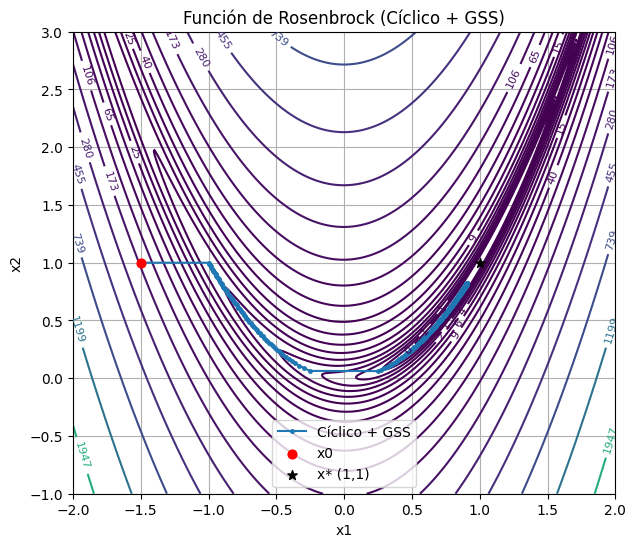

In [ ]:
# Descenso Cíclico (Alternando Ejes) + Golden Section ---

# Definimos la función de Rosenbrock
# f(x, y) = 100(y - x^2)^2 + (1 - x)^2
# El mínimo global está en (1, 1)

def f_rosenbrock(x):
    # x[0] es 'x', x[1] es 'y'
    return 100.0 * (x[1] - x[0]**2)**2 + (1.0 - x[0])**2

# Implementamos el Descenso Cíclico usando Golden Section (GSS)

def coord_descent_cyclic_gss(f, x0, max_passes=500, tol_x=1e-8, gss_interval=(-1.0, 1.0), gss_tol=1e-10):
    # Descenso por coordenadas cíclico (alternando ejes) para una función 'f' no cuadrática.
    # Utiliza golden_section_minimize (GSS) para el paso en cada coordenada.
    #
    # Argumentos:
    # f: Función objetivo (ej: f_rosenbrock)
    # x0: Punto inicial
    # max_passes: Número máximo de pasadas completas (ciclos)
    # tol_x: Tolerancia sobre ||x_k - x_{k-1}|| para detenerse
    # gss_interval: Intervalo [a, b] para buscar el *paso* (alpha)
    # gss_tol: Tolerancia para la búsqueda 1D de GSS


    # Asumimos que golden_section_minimize está definida (Ejemplo 1)

    x = x0.astype(float).copy()
    n = len(x)
    path = [x.copy()] # Guardamos la trayectoria

    print(f"Iniciando Descenso Cíclico + GSS en x0 = {x0}...")

    # Bucle principal (k = pasadas)
    for k in range(1, max_passes + 1):
        x_prev = x.copy()

        # Bucle interno (i = coordenadas)
        for i in range(n):

            # Definir la función 1D para GSS
            # Queremos minimizar f(x_actual + alpha * e_i) respecto a 'alpha'.
            # 'e_i' es el vector unitario (ej: [1, 0] o [0, 1]).
            # Esta función lambda captura 'x' e 'i' del scope actual
            # y solo toma 'alpha' (el paso) como argumento.
            def f_1d_step(alpha):
                x_temp = x.copy()
                x_temp[i] += alpha # Aplicamos el paso 'alpha' solo a la coord 'i'
                return f(x_temp)

            # Ejecutar Golden Section Search (GSS) en el intervalo [a, b]
            # Buscamos el *paso óptimo* (alpha_star)
            a_gss, b_gss = gss_interval

            # GSS (del Ejemplo) nos da el minimizador (el valor alpha_star)
            alpha_star, _, _, _ = golden_section_minimize(
                f_1d_step, a_gss, b_gss, tol=gss_tol, history=False
            )

            # Actualizar la coordenada x[i] con el paso alpha_star
            x[i] += alpha_star

        # Fin del bucle de coordenadas
        path.append(x.copy())

        # Criterio de parada (basado en la norma del cambio en x en una pasada completa)
        if np.linalg.norm(x - x_prev) < tol_x:
            print(f"Convergencia alcanzada en la pasada {k}.")
            break

    if k == max_passes:
        print(f"Se alcanzó el máximo de {max_passes} pasadas.")

    return x, f(x), k, np.array(path)

# Ejecución de la Tarea

# Punto de inicio (lejos del mínimo (1,1))
x0_rosen = np.array([-1.5, 1.0])

# Intervalo de búsqueda para el paso alpha.
# Rosenbrock es sensible; un intervalo pequeño [-0.5, 0.5] suele ser más estable
# (El Ejemplo 2 usaba pasos exactos; aquí debemos definir un rango de búsqueda)
gss_bounds = (-0.5, 0.5)

# Ejecutamos el optimizador
xf_c_gss, ff_c_gss, passes_c_gss, path_c_gss = coord_descent_cyclic_gss(
    f_rosenbrock,
    x0_rosen,
    max_passes=500,
    tol_x=1e-8,
    gss_interval=gss_bounds
)

# --- Reporte en texto (Cíclico + GSS)
print("\n=== Tarea 3 — Descenso Cíclico + GSS (Rosenbrock) ===")
print(f"Punto inicial x0 = {x0_rosen}")
print(f"x_final = {xf_c_gss}")
print(f"f(x_final) = {ff_c_gss:.6e}")
print(f"Pasadas (k) = {passes_c_gss}")
print(f"x* (óptimo) = [1.0, 1.0]")
print(f"||x_final-x*|| = {np.linalg.norm(xf_c_gss - np.array([1.0, 1.0])):.3e}")


# --- Gráfico de contornos + trayectoria (Rosenbrock)
# (Este código de ploteo es específico para Rosenbrock)
x_min_global = np.array([1.0, 1.0])

xs = np.linspace(-2.0, 2.0, 400)
ys = np.linspace(-1.0, 3.0, 400)
XX, YY = np.meshgrid(xs, ys)
ZZ = f_rosenbrock([XX, YY])

plt.figure(figsize=(7, 6))
# Usamos niveles logarítmicos porque Rosenbrock crece muy rápido
levels = np.logspace(-0.5, 3.5, 20, base=10.0)
cs = plt.contour(XX, YY, ZZ, levels=levels)
plt.clabel(cs, inline=True, fontsize=8)

# Graficamos la trayectoria
if path_c_gss is not None:
    plt.plot(path_c_gss[:,0], path_c_gss[:,1], 'o-', lw=1.5, ms=2.5, label="Cíclico + GSS")

plt.scatter([x0_rosen[0]], [x0_rosen[1]], c='r', s=40, label="x0", zorder=5)
plt.scatter([x_min_global[0]], [x_min_global[1]], c='k', s=50, marker='*', label="x* (1,1)", zorder=5)

plt.title("Función de Rosenbrock (Cíclico + GSS)")
plt.xlabel("x1"); plt.ylabel("x2"); plt.legend(); plt.grid(True); plt.show()

##### **Tarea 2 — Descenso por coordenadas aleatorias (muestreo por importancia)**

**Descripción**   
El **descenso por coordenadas aleatorias** (Randomized Coordinate Descent, RCD) es una variante del descenso por coordenadas clásico.  
En lugar de recorrer las coordenadas en orden fijo (1,2,…,n), en cada iteración se **elige aleatoriamente** una coordenada $i$ y se actualiza solo esa componente:
$$x_i \leftarrow x_i - \alpha_i \,\frac{\partial f(x)}{\partial x_i}.$$

La idea es que, al introducir aleatoriedad, el algoritmo puede evitar patrones cíclicos y lograr convergencia más uniforme en problemas de alta dimensión.  
La **dirección** de actualización está dada por el eje canónico correspondiente $e_i$, y la coordenada $i$ se selecciona con **probabilidad proporcional** a una medida de “importancia”:
$$ p_i \propto Q_{ii} \quad \text{o bien} \quad p_i \propto |\nabla_i f(x)|,$$
de modo que las coordenadas más influyentes (o con mayor pendiente) se actualizan con mayor frecuencia.

**Cómo definir la función cuadrática**
Como en laboratorios anteriores, trabajaremos con una función cuadrática convexa:
$$f(x)=\tfrac12 x^\top Qx + b^\top x,$$
donde $Q$ es **simétrica definida positiva (SPD)**.  
Podés generar $Q$ y $b$ usando una *seed* y un tamaño $n$ fijo, con una función como la siguiente:

```python
import numpy as np

def make_spd(n, seed=0):
    rng = np.random.default_rng(seed)
    A = rng.normal(size=(n, n))
    Q = A.T @ A + 0.5*np.eye(n)  # asegura SPD
    b = rng.normal(size=n)
    return Q, b
```
Luego podrás definir $f(x)=0.5 x^\top Qx + b^\top x$ y su gradiente $\nabla f(x) = Qx+b$.

**Objetivos**
1. Implementar el método **Randomized Coordinate Descent (RCD)**.  
2. Comparar su convergencia promedio (10 corridas) frente al **descenso cíclico**.  
3. Reportar tiempo promedio, número esperado de iteraciones y $f$ final.

**Entradas**
- $Q, b$: definen la cuadrática $f(x)=\tfrac12 x^\top Qx + b^\top x$.  
- $x_0$: punto inicial.  
- `seed`: semilla aleatoria para reproducibilidad.  
- Parámetros opcionales: `max_iter`, `tol`, número de repeticiones.

**Salidas**
- Una **tabla resumen** con **medias y desvíos estándar** de:
  $$(\text{tiempo},\ \text{iteraciones},\ f_{\text{final}}).$$
  Cada columna debe mostrar la media y el desvío (por ejemplo: `tiempo = 0.032 ± 0.004 s, f_final = -2.45 ± 0.01`).
- Un gráfico opcional de $f(x_k)$ vs. número de iteración, mostrando la variabilidad entre corridas (líneas más finas o banda sombreada para el desvío).

**Pistas**
- Fijá semillas (`np.random.seed`) para comparar resultados.  
- Asegurá que $Q$ sea **simétrica definida positiva (SPD)** para garantizar convexidad.  
- Registrá la frecuencia de selección de cada coordenada para verificar que sigue la distribución esperada.  
- En promedio, RCD tiene la misma dirección esperada que el gradiente completo, pero con **coste por iteración mucho menor**, ya que actualiza una coordenada por vez.
- **Ejemplo de selección aleatoria ponderada:**
  ```python
  import numpy as np

  # Supongamos que Q es SPD y queremos elegir coordenadas según Q_ii
  Q = np.array([[4.0, 1.0, 0.0],
                [1.0, 3.0, 0.0],
                [0.0, 0.0, 2.0]])

  # Vector de probabilidades proporcionales a Q_ii
  p = np.diag(Q)
  p = p / np.sum(p)

  # Elegir coordenada i con probabilidad p_i
  np.random.seed(42)    # Elimina esto si quieres ver la aleatoriedad en acción.
  i = np.random.choice(len(p), p=p)

  print(f"Coordenada seleccionada: i = {i}, con probabilidad p_i = {p[i]:.2f}")
  ```
  Este código ilustra cómo construir una distribución de probabilidad a partir de los elementos diagonales de $Q$ y cómo seleccionar la coordenada $i$ con la función `np.random.choice`.

Problema generado: n=40, f* = -7.0644
Corriendo 10 simulaciones... (TOL=1.0e-08)
Experimento finalizado.
=== Tabla Resumen (Promedio ± Std) ===
Resultados basados en 10 corridas (n=40, f*=-7.0644)

         Método    Tiempo (s)          Iteraciones                  f_final
  CCD (Cíclico) 0.025 ± 0.005 50.0 ± 0.0 (Pasadas) -6.7952e+00 ± 0.0000e+00
RCD (Ponderado) 0.100 ± 0.008 2000.0 ± 0.0 (Pasos) -5.8490e+00 ± 5.7029e-02

------------------------------------------------------------

Generando gráfico de convergencia (Solo corridas individuales)...


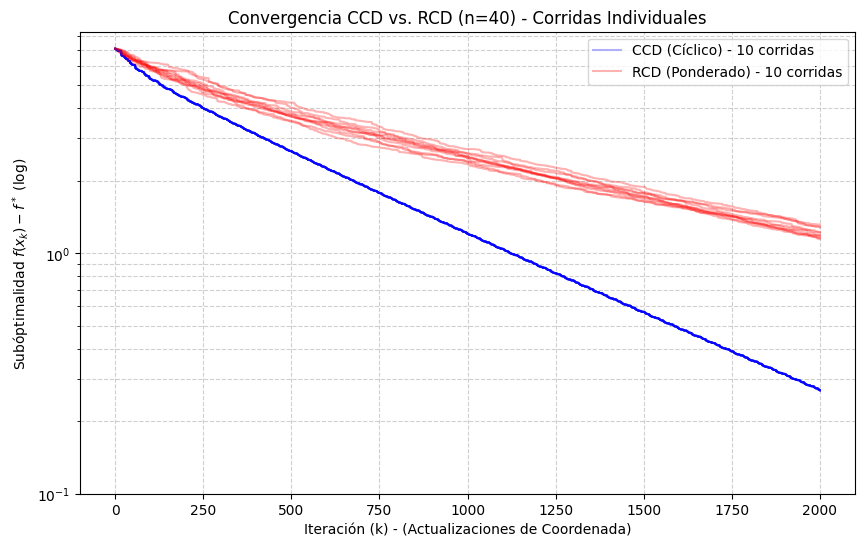

In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Funciones Base

def quad_Qb(Q, b):
    # Devuelve f(x)=0.5 x^T Q x + b^T x y su gradiente ∇f(x)=Qx+b.

    def f(x): return 0.5 * x @ Q @ x + b @ x
    def g(x): return Q @ x + b
    return f, g

def make_spd(n, seed=0):
    # Genera una matriz SPD Q (n,n) y un vector b (n).
    rng = np.random.default_rng(seed)
    A = rng.normal(size=(n, n))
    Q = A.T @ A + 0.5 * np.eye(n) # A^T A es PSD, + 0.5*I la hace SPD
    b = rng.normal(size=n)
    return Q, b

# --- Implementación Cíclica (CCD)  ---
def coord_descent_cyclic_exp(Q, b, x0, max_passes=500, tol=1e-8):
    # Descenso Cíclico (CCD)

    f, g = quad_Qb(Q, b) # Obtenemos f(x) y g(x)
    x = x0.astype(float).copy()
    n = len(x)

    # path_f guardará el historial de f(x) en cada paso
    path_f = [f(x)]
    passes_count = 0

    for k in range(1, max_passes + 1):
        passes_count = k
        x_prev_pass = x.copy() # Guardamos x al inicio de la pasada

        # Bucle interno (coordenadas)
        for i in range(n):
            # Calculamos el gradiente completo (g(x)) y tomamos el componente i
            grad_i = g(x)[i]

            # Paso exacto
            alpha = -grad_i / Q[i, i]

            # Actualización
            x[i] += alpha

            # Guardamos f(x) después de esta actualización (paso)
            path_f.append(f(x))

        # Criterio de parada (basado en el cambio en una pasada completa)
        if np.linalg.norm(x - x_prev_pass) < tol:
            break

    # Retorna: x final, f final, Nro de Pasadas, historial de f(x) (por pasos)
    return x, f(x), passes_count, np.array(path_f)


# --- Implementación Aleatoria (RCD) Ponderada ---


def coord_descent_random_weighted(Q, b, x0, max_iter=2000, tol=1e-8):
    # Descenso Aleatorizado (RCD) y muestreo ponderado //p_i ~ Q_ii
    # max_iter es el Nro de PASOS (actualizaciones), no pasadas.

    f, g = quad_Qb(Q, b)
    x = x0.astype(float).copy()
    n = len(x)

    path_f = [f(x)]
    steps_count = 0

    # Definimos las probabilidades de muestreo (pista del enunciado)
    p_weights = np.diag(Q)
    p_weights = p_weights / np.sum(p_weights) # Normalizamos

    for k in range(1, max_iter + 1):
        steps_count = k

        # Criterio de parada (basado en norma del gradiente completo)
        grad = g(x)
        if np.linalg.norm(grad) < tol:
            break

        # Selección Aleatoria Ponderada (RCD-W)
        i = np.random.choice(n, p=p_weights)

        # Paso exacto (usamos el grad[i] que ya calculamos)
        alpha = -grad[i] / Q[i, i]

        # Actualización
        x[i] += alpha
        path_f.append(f(x))

    # Retorna: x final, f final, Nro de Pasos, historial de f(x) (por pasos)
    return x, f(x), steps_count, np.array(path_f)

# Ejecución

# Parámetros del experimento
N_DIM = 40         # Dimensión del problema (ej: 40)
N_RUNS = 10        # Número de corridas para promediar
SEED_DATA = 42     # Semilla para generar Q y b (fija)
MAX_PASSES = 50    # Máximo de pasadas para CCD

# n*k iteraciones para RCD (presupuesto comparable)
MAX_ITER_RCD = MAX_PASSES * N_DIM
TOL = 1e-8         # Tolerancia de convergencia

# Generar el problema (Q, b)
Q, b = make_spd(N_DIM, seed=SEED_DATA)
x0 = np.zeros(N_DIM) # Punto de inicio

# Calcular la solución óptima (para los gráficos)
# Qx* = -b
x_star = np.linalg.solve(Q, -b)
f_opt, _ = quad_Qb(Q, b)
f_star = f_opt(x_star)
print(f"Problema generado: n={N_DIM}, f* = {f_star:.4f}")
print(f"Corriendo {N_RUNS} simulaciones... (TOL={TOL:.1e})")

# Listas para guardar resultados
results_ccd = {'time': [], 'iters': [], 'f_final': [], 'paths': []}
results_rcd = {'time': [], 'iters': [], 'f_final': [], 'paths': []}

# Bucle del experimento
for i in range(N_RUNS):
    # Usamos 'i' como semilla para la corrida aleatoria (para RCD)
    run_seed = i

    # --- Ejecutar CCD (Cíclico) ---
    # No es aleatorio, medimos el tiempo
    t0 = time.time()
    xf_c, ff_c, passes_c, path_c = coord_descent_cyclic_exp(
        Q, b, x0, max_passes=MAX_PASSES, tol=TOL
    )
    t_ccd = time.time() - t0

    # Guardamos métricas de CCD
    results_ccd['time'].append(t_ccd)
    results_ccd['iters'].append(passes_c) # Guardamos Nro de Pasadas
    results_ccd['f_final'].append(ff_c)
    results_ccd['paths'].append(path_c)

    # --- Ejecutar RCD (Ponderado) ---
    np.random.seed(run_seed) # Fijamos la semilla para reproducibilidad de esta corrida
    t0 = time.time()
    xf_r, ff_r, steps_r, path_r = coord_descent_random_weighted(
        Q, b, x0, max_iter=MAX_ITER_RCD, tol=TOL
    )
    t_rcd = time.time() - t0

    # Guardamos métricas de RCD
    results_rcd['time'].append(t_rcd)
    results_rcd['iters'].append(steps_r) # Guardamos Nro de Pasos
    results_rcd['f_final'].append(ff_r)
    results_rcd['paths'].append(path_r)

print("Experimento finalizado.")

# Reporte de Resultados ---

print("=== Tabla Resumen (Promedio ± Std) ===")
print(f"Resultados basados en {N_RUNS} corridas (n={N_DIM}, f*={f_star:.4f})\n")

# Función helper para formatear "media ± std"
def format_stat(data, prec_mean=3, prec_std=3):
    mean = np.mean(data)
    std = np.std(data)
    # Formato científico si es muy pequeño
    if mean < 1e-3 and mean != 0:
        return f"{mean:.{prec_mean}e} ± {std:.{prec_std}e}"
    else:
        return f"{mean:.{prec_mean}f} ± {std:.{prec_std}f}"

# Crear la tabla usando Pandas (más ordenado)
data = {
    'Método': ['CCD (Cíclico)', 'RCD (Ponderado)'],

    'Tiempo (s)': [
        format_stat(results_ccd['time'], 3, 3),
        format_stat(results_rcd['time'], 3, 3)
    ],

    # Nota: Iteraciones significa "Pasadas" para CCD y "Pasos" para RCD
    'Iteraciones': [
        f"{np.mean(results_ccd['iters']):.1f} ± {np.std(results_ccd['iters']):.1f} (Pasadas)",
        f"{np.mean(results_rcd['iters']):.1f} ± {np.std(results_rcd['iters']):.1f} (Pasos)"
    ],

    'f_final': [
        format_stat(results_ccd['f_final'], 4, 4),
        format_stat(results_rcd['f_final'], 4, 4)
    ]
}

df_report = pd.DataFrame(data)
print(df_report.to_string(index=False))
print("\n" + "-"*60 + "\n")


# Gráfico


print("Generando gráfico de convergencia (Solo corridas individuales)...")
plt.figure(figsize=(10, 6))

# Trazamos f(x) - f* (suboptimalidad) en escala logarítmica
# El eje X son los "pasos" (actualizaciones de 1 coordenada)

# Graficar corridas individuales
for i in range(N_RUNS):
    # --- CCD (Cíclico) ---
    path_c = results_ccd['paths'][i]

    # Añadimos la etiqueta (label) solo a la primera línea (i=0)
    label_c = f'CCD (Cíclico) - {N_RUNS} corridas' if i == 0 else None

    # Hacemos las líneas un poco más visibles (alpha=0.3, lw=1.5)
    plt.plot(path_c - f_star, c='blue', alpha=0.3, lw=1.5, label=label_c)

    # --- RCD (Ponderado) ---
    path_r = results_rcd['paths'][i]

    # Añadimos la etiqueta solo a la primera línea (i=0)
    label_r = f'RCD (Ponderado) - {N_RUNS} corridas' if i == 0 else None

    plt.plot(path_r - f_star, c='red', alpha=0.3, lw=1.5, label=label_r)




# --- Configuración del Gráfico ---
plt.yscale('log')
plt.title(f'Convergencia CCD vs. RCD (n={N_DIM}) - Corridas Individuales')
plt.xlabel('Iteración (k) - (Actualizaciones de Coordenada)')
plt.ylabel('Subóptimalidad $f(x_k) - f^*$ (log)')
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.6)

plt.ylim(bottom=max(TOL**2, 1e-1))

plt.show()